In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
import folium
import numpy as np
from matplotlib import font_manager , rc
mpl.rcParams['axes.unicode_minus']=False
plt.rc('font',family='Malgun Gothic')

In [2]:
hotel1 = pd.read_excel('./login/인기태그/1성급인기태그.xlsx')
hotel2 = pd.read_excel('./login/인기태그/2성급인기태그.xlsx')
hotel3 = pd.read_excel('./login/인기태그/3성급인기태그.xlsx')
hotel4 = pd.read_excel('./login/인기태그/4성급인기태그.xlsx')
hotel5 = pd.read_excel('./login/인기태그/5성급인기태그.xlsx')
total = pd.read_excel('./login/인기태그/totaltag.xlsx')
motel = pd.read_excel('./login/인기태그/모텔인기태그.xlsx')
hotelno = pd.read_excel('./login/인기태그/일반호텔인기태그.xlsx')
hoteltot = pd.read_excel('./login/인기태그/총호텔인기테그.xlsx')
hotelpri = pd.read_excel('./login/인기태그/프리미엄호텔인기태그.xlsx')
bb = pd.read_excel('./login/업소종류별분석.xlsx')
df = pd.read_excel('./login/middle4.xlsx')

In [3]:
bb = pd.read_excel('./login/fi업소별분석.xlsx')

In [4]:
bb

,종류,평균평점,평균가격,cnt(종류),평균도보거리(m),평균후기총합
0,1성급,4.200000,81830.625000,16,533.125000,301.875000
1,2성급,4.260000,107795.666667,30,582.222222,595.433333
2,3성급,4.502083,165394.583333,48,647.446809,1685.270833
3,4성급,4.634286,209979.142857,35,639.696970,1505.685714
4,5성급,4.757576,452173.333333,33,594.137931,559.090909
5,게스트하우스,4.360000,59800.400000,5,646.000000,12.000000
6,레지던스,4.277778,121457.500000,18,671.111111,839.222222
7,모텔,4.402273,75102.136364,836,571.006369,3019.751208
8,일반호텔,4.247590,131977.511628,172,601.307190,726.951515
9,전통호텔,4.500000,270000.000000,1,580.000000,42.000000


In [5]:
a = df[['이름','종류','평점','숙박가격','총후기','지하철역_평균거리(1km내)','위도','경도']]
a['지하철역_평균거리(1km내)'] = a['지하철역_평균거리(1km내)']*1000
a

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11856\3192693703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['지하철역_평균거리(1km내)'] = a['지하철역_평균거리(1km내)']*1000


,이름,종류,평점,숙박가격,총후기,지하철역_평균거리(1km내),위도,경도
0,앰배서더 서울 풀만 호텔,프리미엄호텔,4.8,250000,169,680.0,37.560599,127.002136
1,글래드 여의도,4성급,4.7,200640,4416,900.0,37.527409,126.917265
2,글래드 마포,4성급,4.8,143000,7717,550.0,37.542844,126.951336
3,더 리프 사당,일반호텔,4.3,265000,77,100.0,37.475718,126.981124
4,나인트리 프리미어 로카우스 호텔 서울 용산,일반호텔,4.7,158000,36,690.0,37.527640,126.964349
...,...,...,...,...,...,...,...,...
1201,서울 인사동알게스트하우스,게스트하우스,4.8,60000,4,560.0,37.573042,126.989218
1202,서울 룩스게스트하우스,게스트하우스,3.6,57000,13,680.0,37.554856,126.930407
1203,서울 Bottlehouse펜션,펜션/호스텔,4.0,108000,3,NaN,37.497175,126.844208
1204,서울 종로준오호텔펜션,펜션/호스텔,5.0,90000,1,680.0,37.575017,126.984243


In [6]:
a

,이름,종류,평점,숙박가격,총후기,지하철역_평균거리(1km내),위도,경도
0,앰배서더 서울 풀만 호텔,프리미엄호텔,4.8,250000,169,680.0,37.560599,127.002136
1,글래드 여의도,4성급,4.7,200640,4416,900.0,37.527409,126.917265
2,글래드 마포,4성급,4.8,143000,7717,550.0,37.542844,126.951336
3,더 리프 사당,일반호텔,4.3,265000,77,100.0,37.475718,126.981124
4,나인트리 프리미어 로카우스 호텔 서울 용산,일반호텔,4.7,158000,36,690.0,37.527640,126.964349
...,...,...,...,...,...,...,...,...
1201,서울 인사동알게스트하우스,게스트하우스,4.8,60000,4,560.0,37.573042,126.989218
1202,서울 룩스게스트하우스,게스트하우스,3.6,57000,13,680.0,37.554856,126.930407
1203,서울 Bottlehouse펜션,펜션/호스텔,4.0,108000,3,NaN,37.497175,126.844208
1204,서울 종로준오호텔펜션,펜션/호스텔,5.0,90000,1,680.0,37.575017,126.984243


<Figure size 1200x600 with 0 Axes>

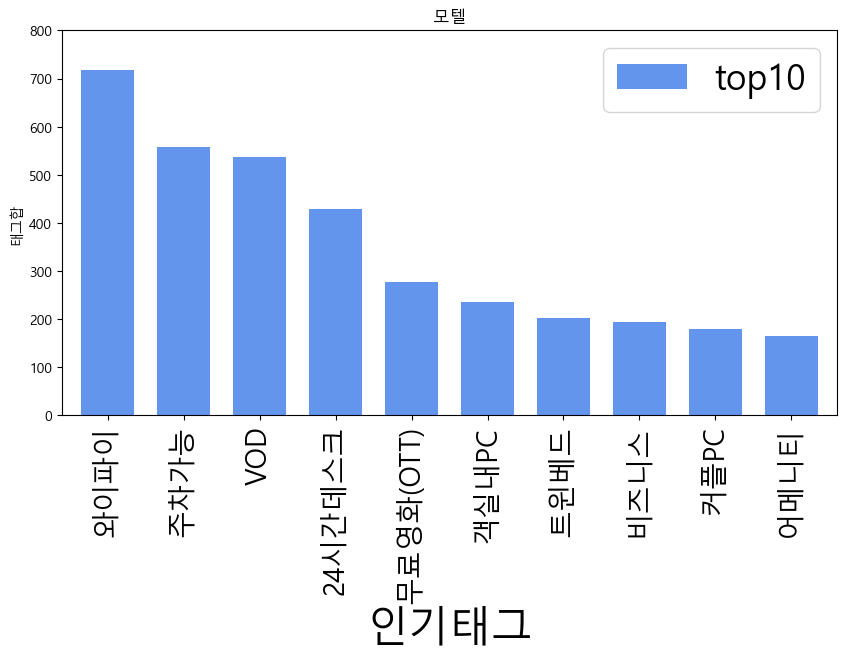

In [18]:
plt.figure(figsize=(12,6))#그림사이즈(가로인치,세로인치)
motel.plot(kind='bar',figsize=(10,5),width=0.7,
        color='cornflowerblue')

plt.title('모텔') #타이틀 이름
plt.xlabel('인기태그',size=30) #x축의 이름
plt.xticks(size=20, rotation='vertical')
plt.ylabel('태그합') #y축의 이름
plt.ylim(0, 800)#y축의 범위지정(최소값,최대값)
plt.legend(fontsize=25, labels=['top10'], loc='best') #범례

plt.show() # 변경 사항을 저장하고 출력

In [8]:
hotel1 = hotel1.reset_index(drop=True)

In [9]:
motel = motel.drop(columns={'Unnamed: 0','종류'})
motel = motel.set_index('인기태그')
motel = motel.head(10)

In [10]:
hotelpri

,Unnamed: 0,종류,인기태그,태그합
0,124,프리미엄호텔,객실금연,12
1,125,프리미엄호텔,24시간데스크,12
2,133,프리미엄호텔,와이파이,11
3,137,프리미엄호텔,레스토랑,11
4,141,프리미엄호텔,수화물보관,10
5,142,프리미엄호텔,조식운영,10
6,143,프리미엄호텔,유료세탁,10
7,145,프리미엄호텔,주차가능,10
8,148,프리미엄호텔,어메니티,10
9,149,프리미엄호텔,피트니스,10


In [11]:
a = a.groupby('종류')['총후기'].agg(['mean'])
a = a.rename(columns = {'mean':'평균후기총합'})
a = a.reset_index()

In [12]:
a = a.reset_index()

In [13]:
a.drop(columns='종류',inplace=True)

In [14]:
qwe = pd.concat([bb,a],axis=1)
qwe

,종류,평균평점,평균가격,cnt(종류),평균도보거리(m),평균후기총합,index,평균후기총합
0,1성급,4.200000,81830.625000,16,533.125000,301.875000,0,301.875000
1,2성급,4.260000,107795.666667,30,582.222222,595.433333,1,595.433333
2,3성급,4.502083,165394.583333,48,647.446809,1685.270833,2,1685.270833
3,4성급,4.634286,209979.142857,35,639.696970,1505.685714,3,1505.685714
4,5성급,4.757576,452173.333333,33,594.137931,559.090909,4,559.090909
5,게스트하우스,4.360000,59800.400000,5,646.000000,12.000000,5,12.000000
6,레지던스,4.277778,121457.500000,18,671.111111,839.222222,6,839.222222
7,모텔,4.402273,75102.136364,836,571.006369,3019.751208,7,3019.751208
8,일반호텔,4.247590,131977.511628,172,601.307190,726.951515,8,726.951515
9,전통호텔,4.500000,270000.000000,1,580.000000,42.000000,9,42.000000


In [15]:
qwe.to_excel('./login/fi업소별분석.xlsx',index=False, encoding='utf-8-sig')

c:\python38\lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


In [16]:
sm2=folium.Map(location=[37.55,126.98],  #지도위치
              tiles='Stamen Toner', #지도형태 
              zoom_start=12)         #시작 줌
sm2.save('./seoul.html')

In [17]:
map = folium.Map(location=[37.581,126.986], zoom_start=10)
for i in df.index:
    folium.CircleMarker([a.위도[i],a.경도[i]],
                        radius=5,
                        tooltip=f'이름:{a.이름[i]}\n종류:{a.종류[i]}\n평점:{a.평점[i]}\n숙박가격:{a.숙박가격[i]}',
                        color='crimson',
                        fill_color='crimson').add_to(map)

AttributeError: 'DataFrame' object has no attribute '위도'

In [ ]:
map

In [ ]:
a = df[['이름','종류','평점','숙박가격','총후기','지하철역_평균거리(1km내)','위도','경도']]
a['지하철역_평균거리(1km내)'] = a['지하철역_평균거리(1km내)']*1000
a

In [ ]:
a

In [ ]:
bb['전체예상매출액']=(bb['평균가격']*bb['평균후기총합']).astype(int)

In [ ]:
bb['각각예상매출액'] = (bb['예상매출액']/bb['cnt(종류)']).astype(int)

In [ ]:
bb.to_excel('./login/fina업소별분석.xlsx',index=False, encoding='utf-8-sig')

In [ ]:
a[['숙박가격']].plot(kind='box') # 숙박업전체의 숙박가격 

In [ ]:
q = a[a['종류']=='모텔']

In [ ]:
ii = pd.read_excel('./login/fina업소별분석.xlsx')

In [ ]:
ii